##**NAME:-ANJANA KULKARNI**
##**ID:-20191COM0014**

##**GET THE DATA**

In [ ]:
import numpy as np 
import pandas as pd
import os


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
Customers = pd.read_csv('Mall_Customers.csv')
Customers

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
Customers.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
Customers.describe()


,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

In [ ]:
Customers.drop('CustomerID',inplace=True,axis=1)

In [ ]:
Customers=pd.get_dummies(Customers)

##**Exploratory Data Analysis**

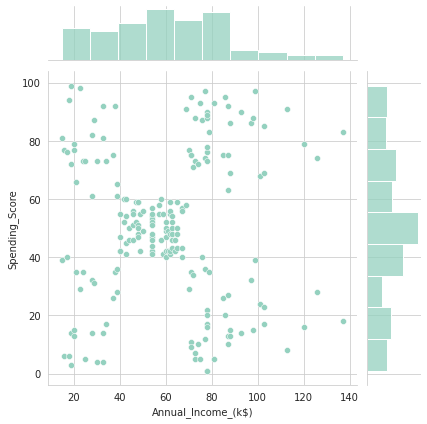

In [ ]:
sns.jointplot(x='Annual_Income_(k$)',y='Spending_Score',data=Customers)

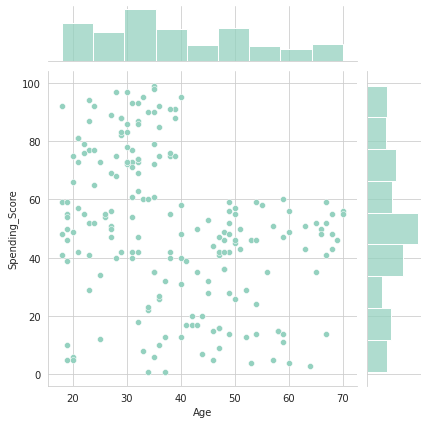

In [ ]:
sns.jointplot(x='Age',y='Spending_Score',data=Customers)

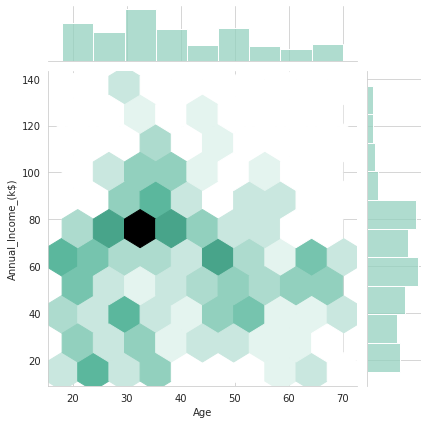

In [ ]:
sns.jointplot(x='Age',y='Annual_Income_(k$)',kind="hex",data=Customers)

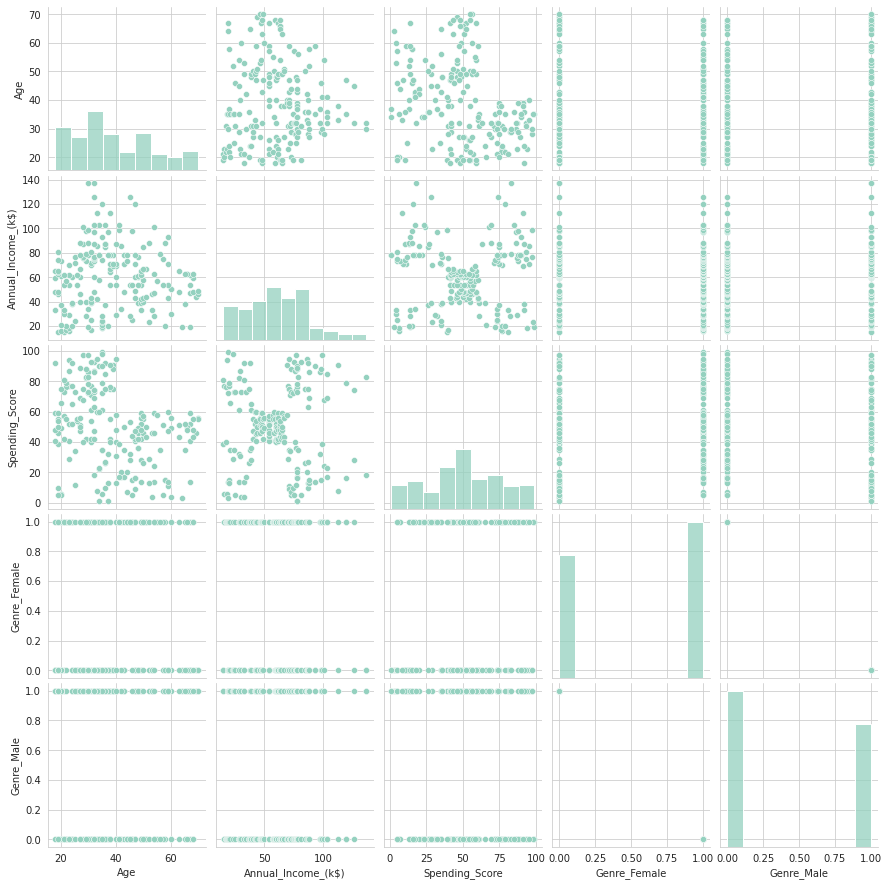

In [ ]:
sns.pairplot(Customers)


##**Training and Testing Data**

In [ ]:
X = Customers[['Age', 'Annual_Income_(k$)', 'Genre_Female','Genre_Male']]

In [ ]:
y = Customers['Spending_Score']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##**Training the Model**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm.coef_

array([-0.58792363,  0.05386299,  0.59923281, -0.59923281])

##**Predicting Test Data**

In [ ]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

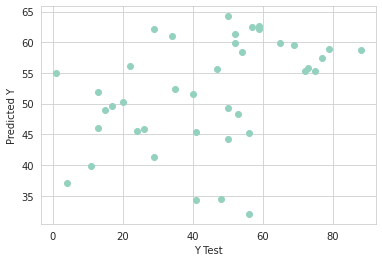

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

##**Evaluating the Model**

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE :'," ", metrics.mean_absolute_error(y_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(y_test,predictions))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE :   18.151395326685105
MSE :   480.67314170724796
RMAE :   21.924259205438343


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


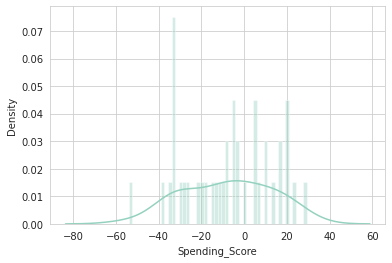

In [ ]:
sns.distplot(y_test - predictions,bins=50)

##**CONCLUSION**

In [ ]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Age,-0.587924
Annual_Income_(k$),0.053863
Genre_Female,0.599233
Genre_Male,-0.599233
